# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import matplotlib
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/data/code/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print("Num brains: ", len(env.brain_names))
print(brain_name)
type(brain)
print(brain)

Num brains:  1
BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

The state space has 37 dimensions and contains:

- 7 rays projecting from the agent at the following angles: [20, 90, 160, 45, 135, 70, 110] # 90 is directly in front of the agent.
- Each ray is projected into the scene. If it encounters one of four detectable objects the value at that position in the array is set to 1. Finally there is a distance measure which is a fraction of the ray length: [Banana, Wall, BadBanana, Agent, Distance]
- The agent's velocity: Left/right velocity (usually near 0) and Forward/backward velocity (0-11.2)

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
# assert type(env_info.vector_observations) is list, "Observations is not a list!"
print(len(env_info.vector_observations))
print(type(env_info.vector_observations)) 
print(brain.vector_action_space_size)
# print(env_info.vector_observations)
# print (state)

import time
time.sleep(5)

1
<class 'numpy.ndarray'>
4


In [ ]:
import time
from dqn_agent import Agent
from trackers import BananaTracker

eps_start=1.0
eps_end=0.01
eps_decay=0.992
eps = eps_start
episodes = 3000
checkpoint_file = 'checkpoint.pth'

tracker = BananaTracker(episodes)

agent = Agent(state_size=state_size, action_size=brain.vector_action_space_size, seed=0)
print ("Loading agent parameters from checkpoint: ", checkpoint_file)
agent.load(checkpoint_file)

# Main loop:
print ("Starting the game...")
for i in range(episodes):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    # Starting episode
#     print ("\tStarting episode {}".format(i))
    counter = 0
    while True:
        # Interaction:
        action = agent.act(state, eps=eps)            # select an action. encourage agent to explore
                                                       #   20% of the time
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state=state, action=action, 
                   next_state=next_state, reward=reward, 
                   done=done)                          # send the reward and next state to the agent
        tracker.step(i, reward, done)

        # Update bookkeeping variables
        counter += 1
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        eps = max(eps_end, eps_decay*eps)
        if done:                                       # exit loop if episode finished
            if i % 50 == 0:
                tracker.plot()
            break
    #     time.sleep(1)
#     print("\t\tTotal score: {}".format(score))
    
print ("Saving parameters to checkpoint: ", checkpoint_file)
agent.save('checkpoint.pth')

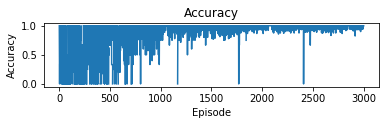

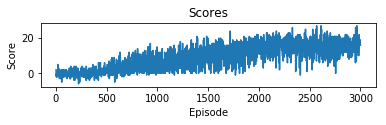

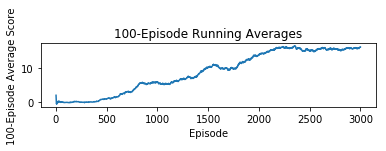

In [8]:
tracker.plot()

In [10]:
print("100-episode running average at the end: ", tracker.running_averages[episodes-1])
print("Total score at the end: ", tracker.scores[episodes-1])

100-episode running average at the end:  16.08
Total score at the end:  16


In [9]:
env.close()